<a href="https://colab.research.google.com/github/HanByeonghyun/HanByeonghyun/blob/main/titanic%EA%B3%BC%EC%A0%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###데이터 준비

In [243]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [244]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


컬럼별 결측값(NaN)의 개수 확인

In [245]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

객실번호(Cabin)는 NaN값이 많고, Cabin과 Name, SibSp, Parch, Ticket, Embarked, PassengerId는 생존(Survived)과 크게 관련이 없다고 생각되기 때문에 이 열들은 제거하고, 나이(Age)는 생존과 관련이 있다고 생각되어 NaN값이 있는 행은 제거하도록 하겠다.

In [246]:
#관련이 없는 열 제거
data.drop(['Cabin', 'Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Embarked'], axis=1, inplace=True)
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [247]:
#Age 중 NaN값이 있는 행 제거
data.dropna(axis=0, inplace=True)
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

성별(Sex) 데이터는 훈련시키기 편하게 female은 1, male은 0으로 변경하고 데이터 타입을 int로 바꾸겠다.

In [248]:
data['Sex'] = data['Sex'].str.replace('female', '1')
data['Sex'] = data['Sex'].str.replace('male', '0')
data

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500
...,...,...,...,...,...
885,0,3,1,39.0,29.1250
886,0,2,0,27.0,13.0000
887,1,1,1,19.0,30.0000
889,1,1,0,26.0,30.0000


In [249]:
data = data.astype({'Sex':'int'})
data.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
Fare        float64
dtype: object

In [250]:
#데이터 타입과 누락된 값 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int64  
 3   Age       714 non-null    float64
 4   Fare      714 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 33.5 KB


##SGD분류

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


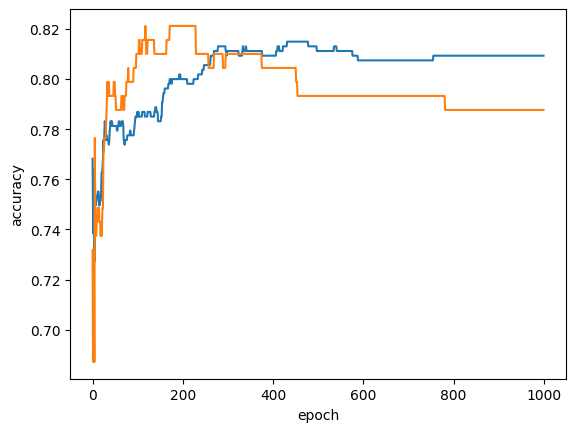

In [303]:
#Survived열은 타깃 데이터로 사용하고 Survived와 관련있는 나머지 4개의 특성은 입력 데이터로 사용
data_input=data[['Pclass', 'Sex', 'Age', 'Fare']].to_numpy()
data_target=data['Survived'].to_numpy()

#train_test_split을 사용해 훈련 세트, 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data_input, data_target, random_state=201935362)

#훈련 세트, 테스트 세트 표준화 전처리
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

#최적의 반복 횟수를 찾기 위해 훈련 세트와 테스트 세트의 점수를 그래프로 표현
from sklearn.linear_model import SGDClassifier
import numpy as np
#로지스틱 손실함수를 지정
sc=SGDClassifier(loss='log', random_state=201935362)
#에포크마다 훈련, 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트 생성
train_score=[]
test_score=[]
#partial_fit() 함수를 사용하기 위해 np.unique() 함수로 train_target에 있는 Survived값 1, 0 목록을 생성
classes=np.unique(train_target)

#1000번의 에포크 동안 훈련을 반복하여 점수를 훈련, 테스트 세트 리스트에 추가
for _ in range(0, 1000):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

#리스트를 사용해 그래프 생성
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [304]:
#훈련 세트와 테스트 세트의 점수가 벌어지기 전인 400번 에포크가 적절한 반복 횟수로 보여 max_iter를 400으로 설정
#자동으로 멈추지 않게 하기 위해서 tol 매개변수를 None으로 지정해 무조건 400번이 반복되게 함
sc=SGDClassifier(loss='log', max_iter=400, tol=None, random_state=201935362)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7981308411214953
0.7821229050279329


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


##결정트리

In [307]:
#결정 트리에서는 표준화 전처리를 하지 않는 것이 더 이해하기 쉽기 때문에 표준화 하지 않은 데이터를 사용
from sklearn.tree import DecisionTreeClassifier
#트리의 최대 깊이를 3으로 제한
dt = DecisionTreeClassifier(max_depth=3, random_state=201935362)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8299065420560747
0.776536312849162


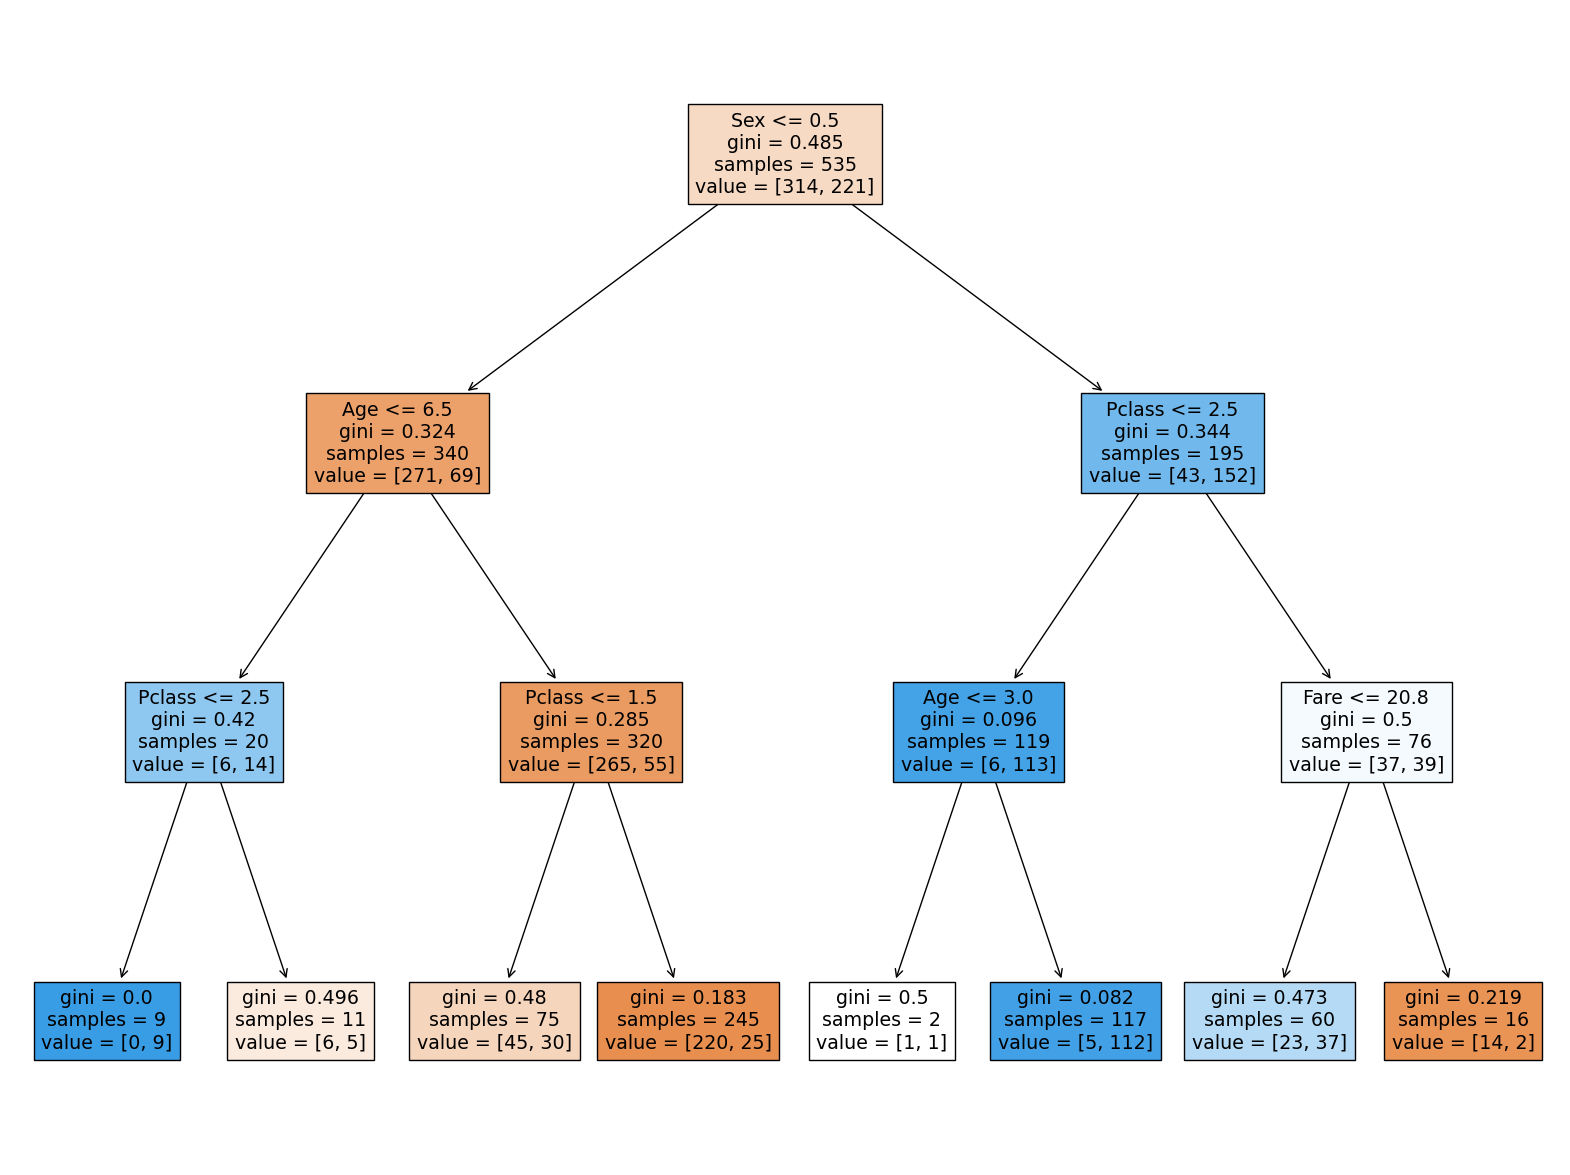

In [309]:
#트리의 깊이를 3으로 제한한 후 그래프 그려 결과 확인
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['Pclass', 'Sex', 'Age', 'Fare'])
plt.show()

In [267]:
#특성 중요도 출력
print(dt.feature_importances_)

[0.23585455 0.63071239 0.08668077 0.04675229]


특성 중요도를 보면 두 번째 특성인 성별이 가장 높고, 그 다음으론 첫 번째 특성인 객실 등급이 높은걸 알 수 있다

 랜덤 서치를 통해 최적의 하이퍼 파라미터를 찾아 결정 트리 모델을 훈련시켰다

In [268]:
from scipy.stats import uniform, randint

#결정트리의 매개변수인 'min_impurity_decrease'는 0.0001에서 0.001 사이의 실숫값,
#'max_depth'는 20에서 50 사이의 정수, 'main_samples_split'은 2에서 25사이의 정수,
#'min_samples_leaf'는 1에서 25사이의 정수를 샘플링한다
params = {'min_impurity_decrease':uniform(0.0001, 0.001),
          'max_depth':randint(20,50),
          'min_samples_split':randint(2,25),
          'min_samples_leaf':randint(1,25),}

#매개변수 범위에서 총 100번을 샘플링해 교차검증을 수행하고 최적의 파라미터 조합을 찾음
from sklearn.model_selection import RandomizedSearchCV
gs=RandomizedSearchCV(DecisionTreeClassifier(random_state=201935362), params,
                      n_iter=100, n_jobs=-1, random_state=201935362)
gs.fit(train_input, train_target)

print(gs.best_params_)

{'max_depth': 48, 'min_impurity_decrease': 0.0008441269692777657, 'min_samples_leaf': 9, 'min_samples_split': 24}


In [269]:
#최적의 교차검증 점수
print(np.max(gs.cv_results_['mean_test_score']))

0.8149532710280374


In [270]:
#최종 모델의 테스트 세트의 성능
dt=gs.best_estimator_
print(dt.score(test_input, test_target))

0.7877094972067039


##랜덤 포레스트

In [276]:
#SGD 분류에서 나눈 데이터로 교차 검증 수행
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1, random_state=201935362)
#n_jobs 매개변수를 -1로 지정하여 모든 CPU코어를 사용. 또 return_train_score 매개변수를 True로 지정하여
#검증 점수뿐만 아니라 훈련 세트에 대한 점수도 같이 반환
scores=cross_validate(rf, train_input, train_target,
                      return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9911214953271028 0.805607476635514


In [277]:
#랜덤 포레스트 모델을 훈련 세트에 훈련한 후 특성 중요도 계산
rf.fit(train_input, train_target)
print(rf.feature_importances_)

[0.10344121 0.28976612 0.30437207 0.3024206 ]


In [278]:
#랜덤포레스트의 부트스트랩 샘플에 포함되지 않고 남은 샘플을 사용해 결정 트리를 평가
rf=RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=201935362)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.811214953271028


##히스토그램 기반 그래디언트 부스팅

In [287]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
hgb=HistGradientBoostingClassifier(random_state=201935362)
#return_train_score 매개변수를 True로 설정해 검증 점수, 훈련 세트에 대한 점수 반환
scores=cross_validate(hgb, train_input, train_target,
                      return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9448598130841122 0.8093457943925234


In [288]:
hgb.fit(train_input, train_target)
hgb.score(test_input, test_target)

0.8100558659217877

In [290]:
#XGBoost 라이브러리에서 tree_method 매개변수를 'hist'로 지정하면 히스토그램 기반 그레이디언트 부스팅 사용 가능
from xgboost import XGBClassifier
xgb=XGBClassifier(tree_method='hist', random_state=201935362)
scores=cross_validate(xgb, train_input, train_target,
                      return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9817757009345793 0.8


In [292]:
#LightGBM 라이브러리에서도 히스토그램 기반 그레이디언트 부스팅 사용 가능
from lightgbm import LGBMClassifier
lgb=LGBMClassifier(random_state=201935362)
scores=cross_validate(lgb, train_input, train_target,
                      return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9453271028037383 0.811214953271028
